In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['APD', 'BTI', 'COST','CWEN-A', 'MFA', 'MPW','NLY','NYMT','PAA','PFFV','VGT','VOO','VUG','GOOGL','VZ','PYPL','VIG','HDV','VHT']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1', end = '2022-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,148.670013,24.746428,193.835388,14.392803,18.501171,13.122546,6.793259,4.342098,15.709563,NaN,161.639450,217.511673,130.938950,1054.680054,48.088295,85.750000,91.756203,74.554237,150.802765
2019-01-03,144.682922,24.801353,189.726974,14.214486,18.777313,13.525542,6.875684,4.334861,16.274708,NaN,153.650925,212.319489,126.931519,1025.469971,48.259972,82.089996,89.710274,73.253723,147.395767
2019-01-04,150.551819,25.884108,195.236450,14.681508,18.942993,13.475166,6.882552,4.421702,17.259899,NaN,160.332245,219.327438,131.982254,1078.069946,48.380150,86.269997,92.255913,75.040825,152.087540
2019-01-07,148.986755,24.879812,195.955917,14.036166,19.108675,13.701854,6.896290,4.472360,17.786860,NaN,162.123596,220.973068,133.327850,1075.920044,48.689186,86.930000,92.661316,75.217773,153.438889
2019-01-08,147.272659,25.115192,197.423218,13.305915,19.108675,13.945330,6.731440,4.428939,18.191626,NaN,163.682587,223.119904,134.956177,1085.369995,50.114140,88.699997,93.726738,75.898994,155.085327


In [4]:
pf_data.tail() #check companies still open and public at ending date

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
Date,,,,,,,,,,,,,,,,,,,
2021-12-27,298.803864,36.340591,561.703369,32.455433,17.764950,22.578964,7.772306,3.688391,8.948407,26.963234,465.321991,437.337036,324.746857,2958.129883,51.426659,192.009995,170.296082,100.078117,265.908936
2021-12-28,300.553833,36.507607,562.869812,32.269581,17.650827,22.716940,7.781750,3.668928,8.880980,27.002296,462.067413,437.008179,323.298401,2933.739990,51.465706,190.100006,170.714279,100.117828,264.842010
2021-12-29,301.947906,36.654972,565.989929,32.377178,17.688868,23.012606,7.753419,3.668928,8.832819,27.031593,462.107361,437.536377,323.418274,2933.100098,51.114269,189.970001,171.351532,100.236954,265.839111
2021-12-30,300.454987,36.596024,562.142029,32.533684,17.688868,23.121016,7.714603,3.639732,8.929142,27.209129,459.691376,436.300537,322.139618,2924.010010,51.006889,191.880005,170.813858,100.117828,266.736542
2021-12-31,302.313019,36.753216,565.920166,32.748882,17.766792,23.288559,7.588452,3.620268,8.996568,27.209129,457.405212,435.104584,320.561279,2897.040039,50.723785,188.580002,171.013000,100.256805,265.649689


<AxesSubplot:xlabel='Date'>

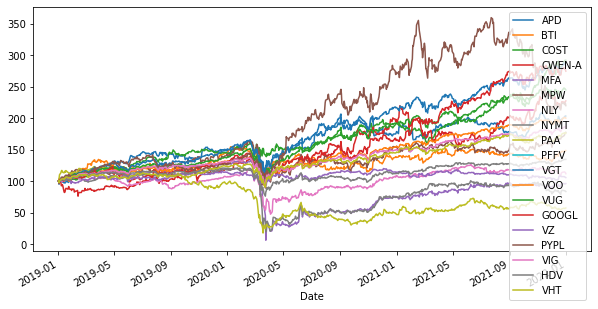

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

APD       0.234700
BTI       0.130802
COST      0.354313
CWEN-A    0.271872
MFA      -0.013394
MPW       0.189693
NLY       0.036606
NYMT     -0.060122
PAA      -0.184334
PFFV      0.126785
VGT       0.343982
VOO       0.229277
VUG       0.296079
GOOGL     0.334144
VZ        0.017644
PYPL      0.260611
VIG       0.205888
HDV       0.097952
VHT       0.187237
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,0.090479,0.036659,0.032769,0.051536,-0.013447,0.061888,0.050112,0.037397,0.066990,0.003622,0.053666,0.049686,0.047889,0.045644,0.027681,0.055672,0.047758,0.048105,0.042153
BTI,0.036659,0.077456,0.020211,0.037284,0.009521,0.049477,0.037130,0.039444,0.060754,0.002285,0.035074,0.035404,0.032356,0.031326,0.021484,0.033000,0.033756,0.037891,0.031563
COST,0.032769,0.020211,0.047826,0.029798,0.012287,0.031526,0.017195,0.016490,0.017832,0.001728,0.038733,0.031222,0.034834,0.033356,0.019292,0.040298,0.029772,0.025602,0.027196
CWEN-A,0.051536,0.037284,0.029798,0.136718,0.047236,0.067146,0.052198,0.081779,0.089649,0.004106,0.049737,0.046667,0.045984,0.039650,0.026736,0.054091,0.043658,0.042675,0.041603
MFA,-0.013447,0.009521,0.012287,0.047236,2.143589,0.096268,0.167995,0.822852,0.121136,0.007223,-0.014067,0.003335,-0.003767,-0.009716,0.033642,-0.048355,0.002202,0.013294,-0.001459
MPW,0.061888,0.049477,0.031526,0.067146,0.096268,0.138338,0.077862,0.123689,0.107539,0.004822,0.060469,0.059036,0.057485,0.053972,0.033241,0.063076,0.055168,0.055748,0.050064
NLY,0.050112,0.037130,0.017195,0.052198,0.167995,0.077862,0.140023,0.164174,0.126426,0.004699,0.041785,0.047031,0.040538,0.033839,0.022877,0.039743,0.042886,0.049343,0.035383
NYMT,0.037397,0.039444,0.016490,0.081779,0.822852,0.123689,0.164174,0.586634,0.226877,0.008376,0.043762,0.051086,0.045159,0.040878,0.030758,0.034629,0.043165,0.050125,0.036125
PAA,0.066990,0.060754,0.017832,0.089649,0.121136,0.107539,0.126426,0.226877,0.410024,0.008625,0.070757,0.074894,0.067607,0.065455,0.024802,0.073653,0.062622,0.075202,0.055125
PFFV,0.003622,0.002285,0.001728,0.004106,0.007223,0.004822,0.004699,0.008376,0.008625,0.005048,0.006742,0.004851,0.006071,0.007042,0.001196,0.007427,0.003760,0.003282,0.003677


In [9]:
log_returns.corr() #get correlation between each pair.

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,1.000000,0.437905,0.498150,0.463362,-0.030533,0.553176,0.445211,0.162324,0.347799,0.212372,0.648326,0.735647,0.658603,0.514030,0.493371,0.468336,0.765199,0.731469,0.670541
BTI,0.437905,1.000000,0.332072,0.362313,0.023365,0.477972,0.356534,0.185044,0.340913,0.155389,0.457955,0.566549,0.480942,0.381288,0.413863,0.300041,0.584553,0.622718,0.542644
COST,0.498150,0.332072,1.000000,0.368509,0.038375,0.387587,0.210127,0.098448,0.127337,0.129537,0.643599,0.635832,0.658920,0.516674,0.472941,0.466276,0.656111,0.535459,0.595034
CWEN-A,0.463362,0.362313,0.368509,1.000000,0.087256,0.488246,0.377264,0.288767,0.378643,0.198094,0.488797,0.562098,0.514472,0.363253,0.387660,0.370177,0.569060,0.527887,0.538367
MFA,-0.030533,0.023365,0.038375,0.087256,1.000000,0.176783,0.306638,0.733782,0.129210,0.298541,-0.034913,0.010145,-0.010643,-0.022481,0.123188,-0.083573,0.007248,0.041532,-0.004768
MPW,0.553176,0.477972,0.387587,0.488246,0.176783,1.000000,0.559441,0.434186,0.451535,0.281079,0.590787,0.706901,0.639369,0.491560,0.479139,0.429130,0.714853,0.685554,0.644059
NLY,0.445211,0.356534,0.210127,0.377264,0.306638,0.559441,1.000000,0.572823,0.527634,0.329746,0.405775,0.559755,0.448156,0.306336,0.327763,0.268755,0.552357,0.603133,0.452439
NYMT,0.162324,0.185044,0.098448,0.288767,0.733782,0.434186,0.572823,1.000000,0.462596,0.366789,0.207626,0.297047,0.243911,0.180796,0.215294,0.114408,0.271616,0.299336,0.225680
PAA,0.347799,0.340913,0.127337,0.378643,0.129210,0.451535,0.527634,0.462596,1.000000,0.274311,0.401542,0.520895,0.436769,0.346269,0.207659,0.291062,0.471327,0.537170,0.411922
PFFV,0.212372,0.155389,0.129537,0.198094,0.298541,0.281079,0.329746,0.366789,0.274311,1.000000,0.442853,0.477528,0.455758,0.384352,0.121093,0.276462,0.413418,0.339921,0.374790


***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,...,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
0,0.131363,0.252498,0.001049,0.060145,0.074732,0.016861,0.086360,0.000723,0.083198,0.022164,...,0.058551,0.020811,0.093063,0.067682,0.032701,0.027438,0.049048,0.006545,0.119429,0.084459
1,0.190746,0.246578,0.068483,0.017192,0.025951,0.054707,0.017503,0.090525,0.054234,0.099966,...,0.009114,0.071995,0.084699,0.100423,0.077738,0.031494,0.038512,0.091112,0.009745,0.039087
2,0.166040,0.235490,0.063605,0.106738,0.030482,0.067207,0.054858,0.068483,0.017618,0.007660,...,0.016870,0.074063,0.048764,0.074144,0.031770,0.035268,0.024588,0.075456,0.067522,0.053724
3,0.164048,0.243925,0.107443,0.062350,0.010391,0.110568,0.038891,0.038777,0.071625,0.011454,...,0.035371,0.007166,0.067964,0.067008,0.110803,0.006266,0.036551,0.035876,0.021383,0.051583
4,0.186391,0.227324,0.105823,0.084475,0.075692,0.039195,0.076855,0.070996,0.022708,0.019404,...,0.107895,0.035904,0.002207,0.026483,0.102656,0.005399,0.041015,0.077802,0.016866,0.054177


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,...,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
2995,0.165343,0.241061,0.068055,0.054560,0.078985,0.068727,0.035906,0.067233,0.021960,0.071352,...,0.034212,0.067230,0.034451,0.068915,0.028725,0.039835,0.046028,0.033616,0.067212,0.043163
2996,0.144208,0.255235,0.076907,0.063768,0.009297,0.028754,0.056890,0.056998,0.084279,0.051295,...,0.061141,0.079071,0.072136,0.058463,0.017552,0.030358,0.085693,0.051670,0.024551,0.007765
2997,0.147145,0.231194,0.078561,0.012882,0.012188,0.014570,0.050830,0.028162,0.072267,0.046920,...,0.078192,0.054616,0.060782,0.014809,0.085119,0.079117,0.074190,0.029709,0.063765,0.086442
2998,0.147239,0.241552,0.076004,0.031063,0.012688,0.073736,0.054275,0.001288,0.073668,0.025955,...,0.010550,0.067613,0.017766,0.049759,0.080077,0.087491,0.042115,0.088854,0.081600,0.038516
2999,0.140628,0.245695,0.077168,0.040603,0.056675,0.030584,0.075917,0.076097,0.014736,0.017646,...,0.036705,0.009686,0.104027,0.062849,0.020792,0.070775,0.031282,0.029458,0.098849,0.054670


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,...,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
1434,0.171538,0.188161,0.013595,0.035273,0.086198,0.110296,0.015619,0.041214,0.129665,0.016886,...,0.139712,0.022732,0.043720,0.008256,0.070310,0.068371,0.003222,0.021844,0.063018,0.102116
2493,0.164432,0.189370,0.057046,0.040350,0.054456,0.070633,0.012843,0.022315,0.114621,0.012464,...,0.126815,0.020512,0.091718,0.007304,0.029510,0.060858,0.027513,0.095883,0.107467,0.037285
1697,0.182743,0.189769,0.079129,0.084357,0.095846,0.086269,0.015147,0.114422,0.033004,0.000608,...,0.116495,0.025242,0.092130,0.030436,0.004588,0.091487,0.015033,0.008480,0.044682,0.047966
2307,0.172845,0.189947,0.073150,0.050408,0.012063,0.046726,0.025734,0.008731,0.043005,0.021713,...,0.127421,0.028117,0.110748,0.121131,0.000303,0.090858,0.065821,0.000644,0.059962,0.106288
2259,0.184692,0.190003,0.035706,0.059239,0.073136,0.055403,0.006084,0.065702,0.052953,0.004023,...,0.110864,0.072341,0.019648,0.053665,0.015211,0.090032,0.080944,0.051605,0.103674,0.039841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,0.119772,0.322772,0.016278,0.004303,0.044518,0.036364,0.099032,0.079047,0.051140,0.124242,...,0.062980,0.016509,0.121922,0.016929,0.081438,0.008824,0.054079,0.002270,0.063974,0.022185
2392,0.120680,0.324290,0.021934,0.070876,0.114546,0.005913,0.124494,0.011174,0.084061,0.124509,...,0.062988,0.031385,0.063526,0.029619,0.048741,0.084264,0.020642,0.020128,0.013567,0.026239
2880,0.097988,0.331564,0.011158,0.049119,0.007389,0.040359,0.117941,0.065249,0.065191,0.118183,...,0.043779,0.039500,0.023188,0.026684,0.015136,0.111236,0.111080,0.037849,0.016125,0.027362
1928,0.116201,0.332050,0.029638,0.059334,0.030380,0.026153,0.115569,0.099328,0.011776,0.112274,...,0.010891,0.008801,0.015988,0.036012,0.097274,0.070331,0.088007,0.054978,0.031443,0.004276


Text(0, 0.5, 'Expected Return')

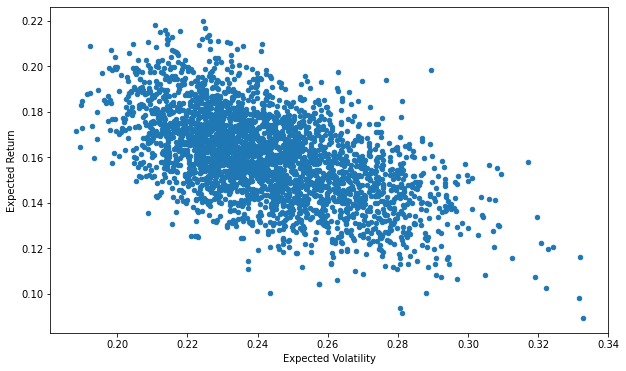

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [19]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 100000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("\tinvest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $100000.00 total.
	invest in APD for $1359.50.
	invest in BTI for $3527.34.
	invest in COST for $8619.81.
	invest in CWEN-A for $11029.58.
	invest in MFA for $1561.94.
	invest in MPW for $4121.43.
	invest in NLY for $12966.48.
	invest in NYMT for $1688.59.
	invest in PAA for $795.21.
	invest in PFFV for $13971.20.
	invest in VGT for $2273.25.
	invest in VOO for $4372.03.
	invest in VUG for $825.63.
	invest in GOOGL for $7031.03.
	invest in VZ for $6837.06.
	invest in PYPL for $322.18.
	invest in VIG for $2184.37.
	invest in HDV for $6301.81.
	invest in VHT for $10211.57.
Expected annual portfolio return is 17.2%
Expected annual portfolio volatility is 18.8%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [20]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 16.4%
Actual annual portfolio volatility is 10.5%
